# **Student Performance Indicator**

***Steps Followed for Analysis***
1. Understanding the problem statement
2. Data collection
3. Data checks performance
4. Exploratory Data Analysis
5. Data Preprocessing
6. Model Training
7. choose the best model

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('StudentsPerformance.csv')

In [ ]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [ ]:
df.shape

(1000, 8)

In [ ]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [ ]:
df['lunch'].dtype == 'O'

True

In [ ]:
df.isna().sum() # missing values (NaN)

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [ ]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [ ]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [ ]:
print(df['gender'].unique())
print(df['race/ethnicity'].unique())
print(df['parental level of education'].unique())
print(df['lunch'].unique())
print(df['test preparation course'].unique())

['female' 'male']
['group B' 'group C' 'group A' 'group D' 'group E']
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
['standard' 'free/reduced']
['none' 'completed']


In [ ]:
numerical_feature = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_feature = [feature for feature in df.columns if df[feature].dtype == 'O']

In [ ]:
print(numerical_feature)
print(categorical_feature)

['math score', 'reading score', 'writing score']
['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


In [ ]:
df['total score'] = df['math score'] + df['reading score'] + df['writing score']

In [ ]:
df['average score'] = df['total score']/3

In [ ]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [ ]:
df[df['reading score'] == 100]['average score']

106     95.666667
114     99.666667
149     97.666667
165     98.666667
179     99.000000
381     94.000000
458    100.000000
546     96.333333
566     97.333333
594     97.000000
712     99.000000
886     96.000000
903     97.666667
916    100.000000
957     97.333333
962    100.000000
970     96.333333
Name: average score, dtype: float64

In [ ]:
df.loc[106]

gender                                  female
race/ethnicity                         group D
parental level of education    master's degree
lunch                                 standard
test preparation course                   none
math score                                  87
reading score                              100
writing score                              100
total score                                287
average score                        95.666667
Name: 106, dtype: object

In [ ]:
reading_full = df[df['reading score'] == 100]['average score'].count()
writing_full = df[df['writing score'] == 100]['average score'].count()
math_full = df[df['math score'] == 100]['average score'].count()

In [ ]:
print(reading_full)
print(writing_full)
print(math_full)

17
14
7


In [ ]:
reading_less_20 = df[df['reading score'] <= 20]['average score'].count()
writing_less_20 = df[df['writing score'] <= 20]['average score'].count()
math_less_20 = df[df['math score'] <= 20]['average score'].count()

In [ ]:
print(reading_less_20)
print(writing_less_20)
print(math_less_20)

1
3
4


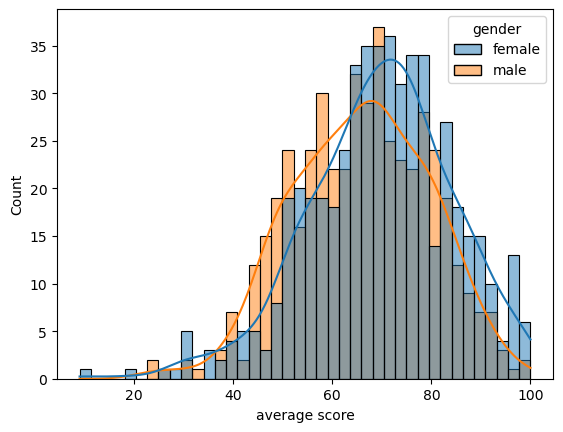

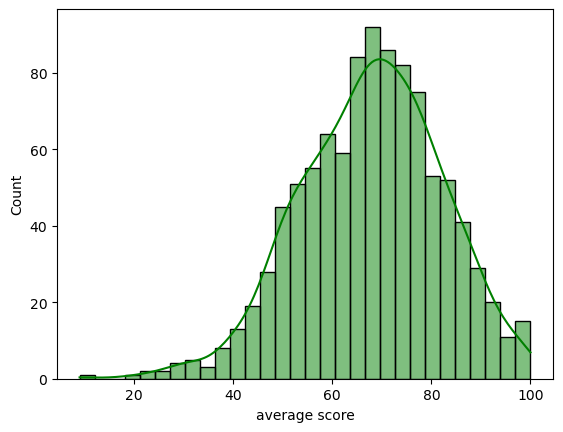

In [ ]:
sns.histplot(data=df, x = 'average score',bins=40, kde=True, hue = 'gender', color='g')
plt.show()
sns.histplot(data=df, x = 'average score', bins=30, kde=True, color='g')
plt.show()

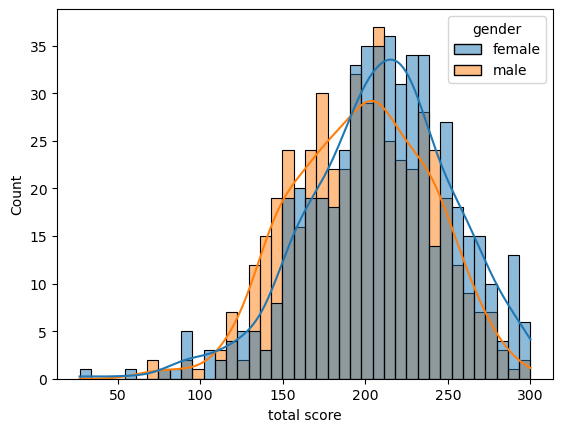

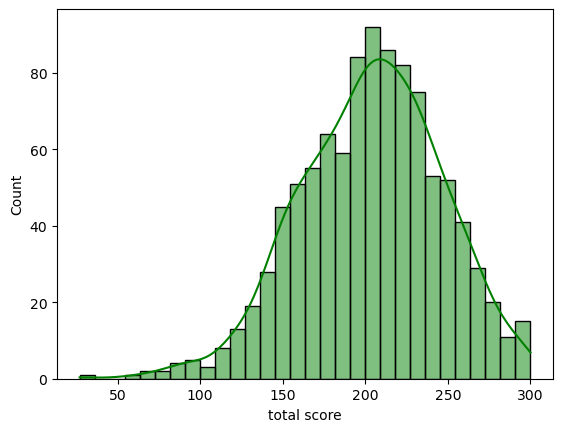

In [ ]:
sns.histplot(data=df, x = 'total score',bins=40, kde=True, hue = 'gender', color='g')
plt.show()
sns.histplot(data=df, x = 'total score', bins=30, kde=True, color='g')
plt.show()

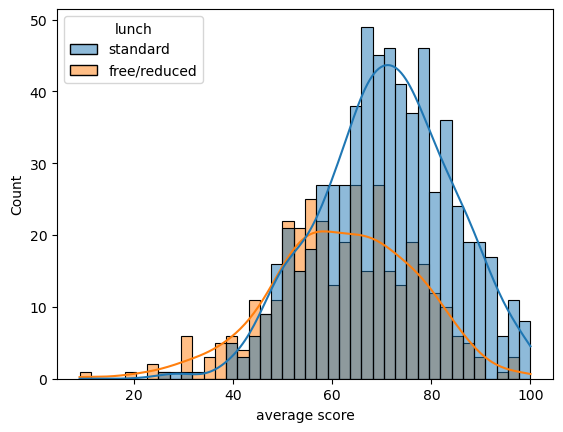

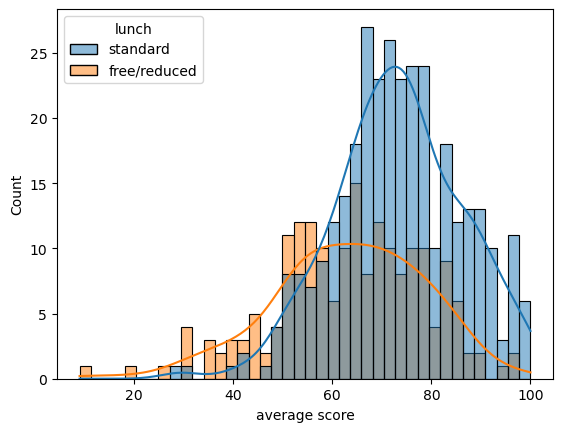

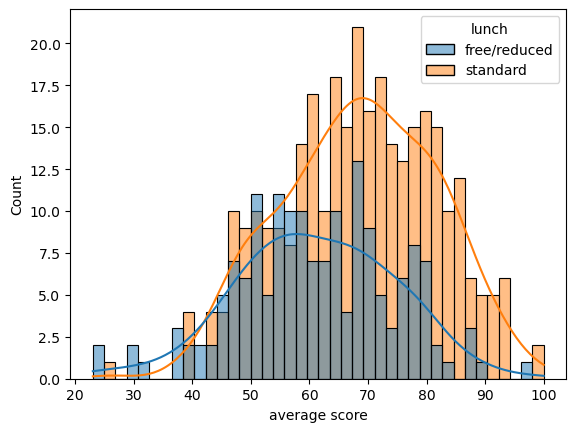

In [ ]:
sns.histplot(data=df, x = 'average score',bins=40, kde=True, hue = 'lunch', color='g')
plt.show()
sns.histplot(data=df[df.gender == 'female'], x = 'average score',bins=40, kde=True, hue = 'lunch', color='g')
plt.show()
sns.histplot(data=df[df.gender == 'male'], x = 'average score',bins=40, kde=True, hue = 'lunch', color='g')
plt.show()

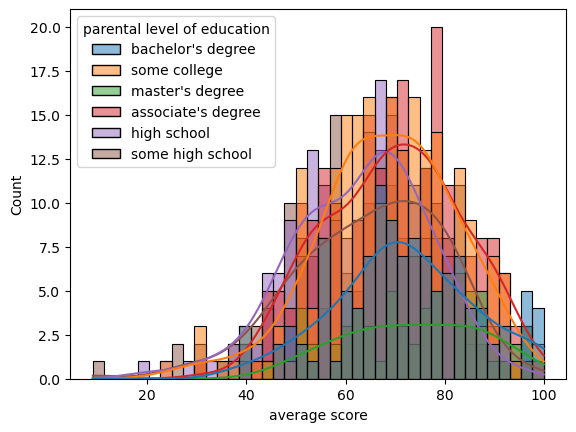

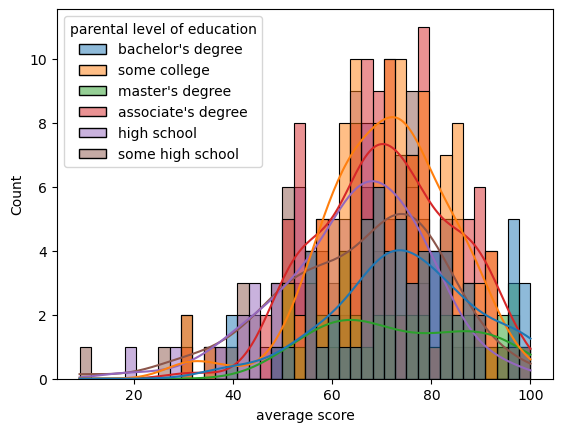

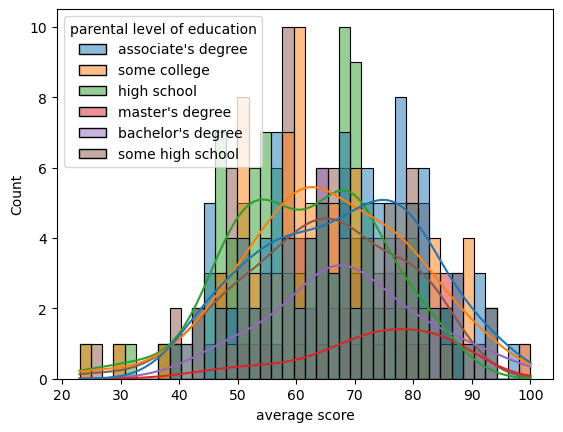

In [ ]:
sns.histplot(data=df, x = 'average score',bins=40, kde=True, hue = 'parental level of education', color='g')
plt.show()
sns.histplot(data=df[df.gender == 'female'], x = 'average score',bins=40, kde=True, hue = 'parental level of education', color='g')
plt.show()
sns.histplot(data=df[df.gender == 'male'], x = 'average score',bins=40, kde=True, hue = 'parental level of education', color='g')
plt.show()

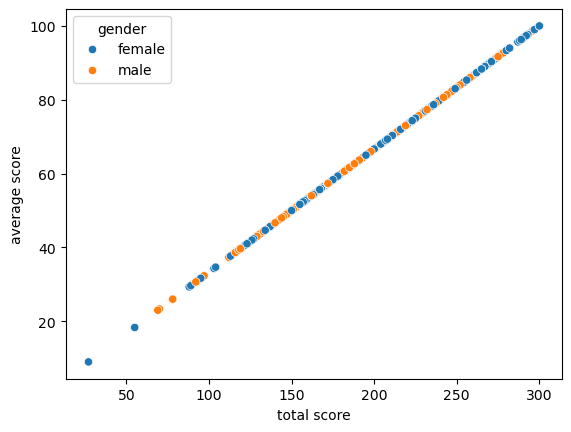

In [ ]:
sns.scatterplot(data=df, x='total score', y = 'average score', hue ='gender')
plt.show()

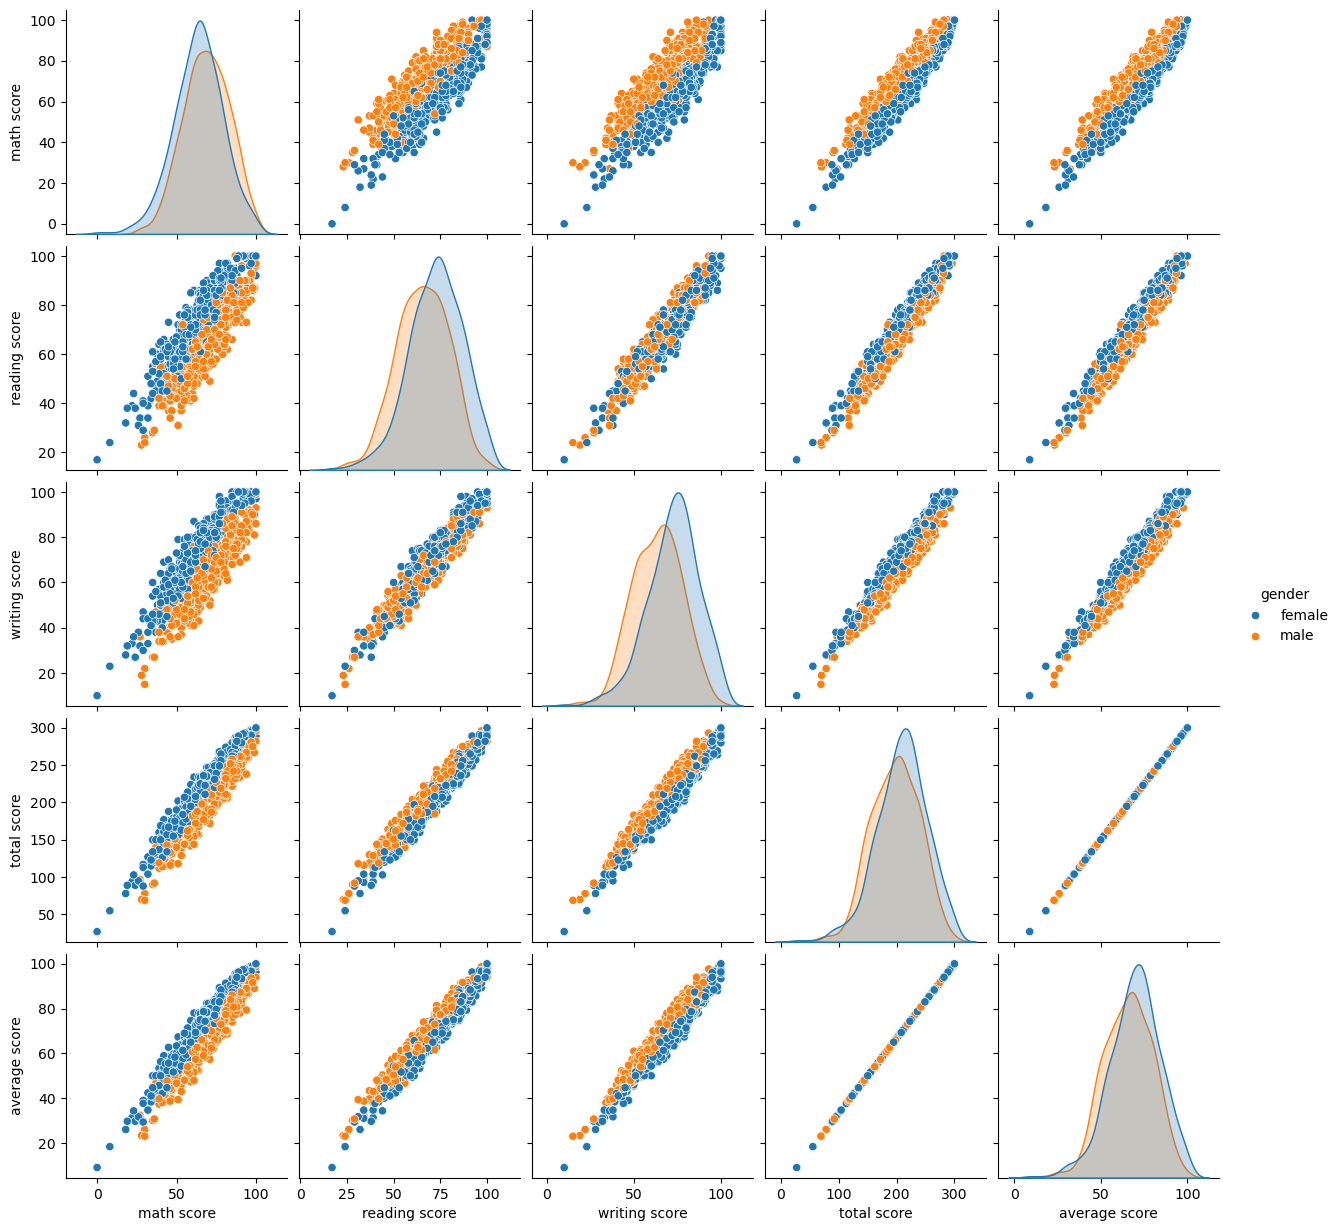

In [ ]:
sns.pairplot(data=df, hue = 'gender')
plt.show()